# Sobre o algoritmo

O intuito desse jupyter notebook é desenvolver o algoritmo de rank de grafo, tendo como base o algoritmo PageRank de Stanford, criado por Larry Page, co-fundador da Google, muito utilizado para ranquear as páginas mais relevantes da Web pelos hiperlink conectados.

----------------
Bibliotecas utilizadas

In [925]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

-----------------------
Criando grafo com arestas direcionadas

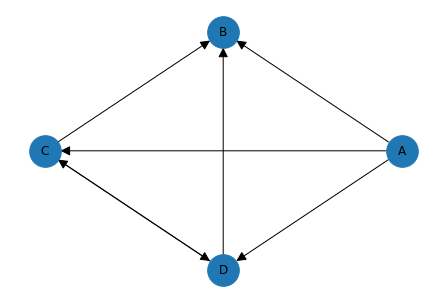

In [926]:
def create_graph(nodes, edges):
    G = nx.DiGraph()
    for i in range(nodes):
        G.add_node(chr(i+65))
    
    for i in range(edges):
        G.add_edge(chr(random.randint(65, nodes+64)), chr(random.randint(65, nodes+64)))

    return G

G = create_graph(4, 7)

options = {
    'arrowsize': 20,
    'width': 1,
    'arrowstyle': '-|>'
}

pos = nx.circular_layout(G, scale=1)
nx.draw(G, pos, with_labels=True, **options, node_size=1000)
plt.show()


----------------
Criando matriz de adjacências para melhor visualização do grafo

[[0. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]


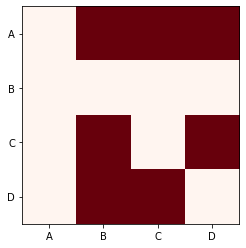

In [927]:
matriz = nx.to_numpy_matrix(G)
print(matriz)


plt.imshow(matriz, cmap='Reds', interpolation='nearest')
plt.xticks(range(len(matriz)), list(G.nodes()))
plt.yticks(range(len(matriz)), list(G.nodes()))
plt.show()


----------------

Cálculo de ranqueamento dos nós:

<div style="background-color: white; width: 300px">
    <img src="img/calc_to_rank.png">
</div>

In [928]:
def rank_to_page(matriz, page_rank):
    N = len(matriz)
    D = .85
    
    matriz_prob = np.zeros((N, N))

    for i in range(len(matriz)):
        for j in range(N):
            if np.sum(matriz[i,:]) == 0:
                matriz_prob[i,j] = 1 / N
            else: 
                matriz_prob[i,j] = matriz[i,j] / np.sum(matriz[i,:])
    
    for i in range(N):
        for j in range(N):
            matriz_prob[i,j] = (1 - D) / N + D * matriz_prob[i,j]

    pr_next = np.zeros(N)
    for i in range(N):
        for j in range(N):
            pr_next[i] += matriz_prob[j,i] * page_rank[j]
    
    return pr_next


[0.090625   0.37395833 0.26770833 0.26770833]


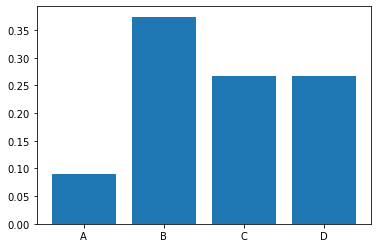

In [929]:

page_rank = np.array([1/len(matriz) for i in range(len(matriz))])
rank_nodes = rank_to_page(matriz, page_rank)
print(rank_nodes)

plt.bar(range(len(rank_nodes)), rank_nodes)
plt.xticks(range(len(rank_nodes)), list(G.nodes()))
plt.show()

----------------
Tabela iterativa de ranqueamento de nós (melhor precisão para nós com mais arestas)

[[0.091 0.117 0.116 0.116 0.116 0.116]
 [0.374 0.37  0.367 0.368 0.368 0.368]
 [0.268 0.256 0.258 0.258 0.258 0.258]
 [0.268 0.256 0.258 0.258 0.258 0.258]]


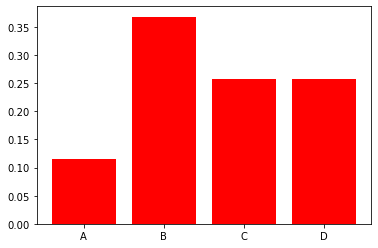

In [930]:
tabela_ranque = np.zeros((len(matriz), 1))
for i in range(len(matriz)):
    tabela_ranque[i] = rank_nodes[i]


for i in range(5):
    temp = rank_to_page(matriz, tabela_ranque[:,i])
    tabela_ranque = np.column_stack((tabela_ranque, temp))
    
print(tabela_ranque.round(3))

plt.bar(range(len(matriz)), tabela_ranque[:, -1].round(3), color='red')
plt.xticks(range(len(matriz)), list(G.nodes()))
plt.show()

Nós mais importantes até os menos importantes --> ['B', 'C', 'D', 'A']


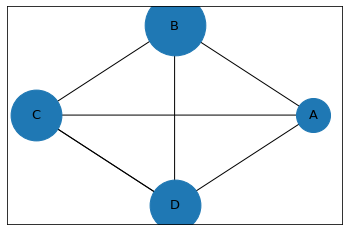

In [931]:
pos = nx.circular_layout(G, scale=1)

for i in range(len(tabela_ranque)):
    nx.draw_networkx_nodes(G, pos, nodelist=[chr(i+65)], node_size=tabela_ranque[i,-1] * 10000)

# printar nós mais importantes
print('Nós mais importantes até os menos importantes -->', sorted(G.nodes(), key=lambda x: tabela_ranque[ord(x)-65, -1], reverse=True))

nx.draw_networkx_edges(G, pos, **options, alpha=1)
nx.draw_networkx_labels(G, pos, font_size=13, font_family='sans-serif')
plt.show()

----------------

## Referências de estudos:

Algoritmo e cálculo para relevância do nó no grafo -
<a>https://pt.wikipedia.org/wiki/PageRank</a>

Biblioteca de grafos -
<a>https://networkx.org/documentation/stable/developer/index.html</a>

Cadeias de Markov -
<a>https://pt.wikipedia.org/wiki/Cadeias_de_Markov</a>